# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [1]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

#### 1.1 Loading the data and creating our dataframe

In [2]:
PATH = 'data/'
DATA_FILE = 'data.tsv.gz'
df = pd.read_csv(PATH+DATA_FILE, compression='gzip', index_col = False, sep='\t', on_bad_lines='skip')

A first glance at the data:


In [3]:
df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

#### 2.1 Filter duplicates

Let's start by searching for redundant rows.

In [4]:
# Check for any duplicate ids
df['id'].is_unique

False

We can see that there are indeed duplicate rows. We'll now create a new dataframe (`cleaned_df`) without this redundancy.

In [5]:
# Creation of a clean version of the data (without modifying the original one)
cleaned_df = df.copy(deep=True)

# Removal of duplicates of each id (the first is kept)
cleaned_df = cleaned_df[~cleaned_df['id'].duplicated(keep='first')]

# Check for any duplicate ids
cleaned_df['id'].is_unique

True

Let's now check whether some rows were removed.

In [6]:
# Visualisation of the initial shape
df.shape

(13497, 11)

In [7]:
# Visualisation of the new shape
cleaned_df.shape

(13488, 11)

We can see that 9 (`id`) duplicate rows were removed.

#### 2.2 Filter with policy rules

Let's create a function to remove the incorrect rows and apply it to our cleaned dataframe.

In [8]:
import math

def drop_bad_rows(cleaned_df):
    """ Removes all rows that do not respect one or both of the policy rules"""
    for ind, row in cleaned_df.iterrows():
        count = 0
        for i in range(1,5):
            if not math.isnan(row['baseline_motorcycle{}'.format(i)]):       
                if not math.isnan(row['update_motorcycle{}'.format(i)]):
                    count += 1
                else: cleaned_df.drop(ind)
            elif not math.isnan(row['update_motorcycle{}'.format(i)]):
                cleaned_df.drop(ind)
        if count != row['motorcycle_count']: 
            cleaned_df.drop(ind)
    return cleaned_df

clean_df = drop_bad_rows(cleaned_df)    

We now check whether some rows were removed.

In [9]:
# Visualisation of the new shape
cleaned_df.shape

(13488, 11)

As no rows were dropped, we suggest that those policy rules hold in the entire cleaned dataset.

#### 2.3 Detect and remove outliers

We compute the means and medians of all the reported kilometrages then visualise our stats data.

In [10]:
# Computation of the mean and the standard deviation then visualisation in a table
df_stats = pd.DataFrame()
df_stats['stat'] = ['mean', 'median']
df_stats.set_index('stat', inplace = True)
for i in range(1,5):
    df_stats['baseline_motorcycle{}'.format(i)] = [cleaned_df['baseline_motorcycle{}'.format(i)].mean(),cleaned_df['baseline_motorcycle{}'.format(i)].median()]
    df_stats['update_motorcycle{}'.format(i)] = [cleaned_df['update_motorcycle{}'.format(i)].mean(),cleaned_df['update_motorcycle{}'.format(i)].median()]

df_stats.round(1)

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
stat,,,,,,,,
mean,7.413998e+14,7.413998e+14,67326.0,92277.6,67657.3,92849.4,67828.0,93374.3
median,5.634150e+04,8.239750e+04,56157.5,82061.0,58821.0,85645.0,68181.0,93387.5


We can see that the means for `baseline_motorcycle1` and `update_motorcycle1` are extremely far from their corresponding medians. The mean of a dataset is sensitive (not robust) to possible outliers. As a result, this could suggest the presence of some outliers. Let's visualize this distribution.

In [11]:
# We define a color palette that will be used carefully throughout the project to be robust for color blind people
color_palette = sns.color_palette("hls",20)

In [12]:
def plot_kil_dist(aux):
    """Plots kilometrage distribution in logarithm scale of baseline or update contracts"""
    fig = plt.figure(figsize=(15,5))

    if(aux == "update_motorcycle"):
        color = color_palette[11]
        fig.suptitle("Distribution of the kilometrage reported in the updated motorcycle contracts")
    else: 
        fig.suptitle("Distribution of the kilometrage reported in the baseline motorcycle contracts")
        color = color_palette[19]
    
    ax11 = fig.add_subplot(141)
    sns.boxplot(data=cleaned_df['{}1'.format(aux)], color=color).set_yscale('log')

    ax21 = fig.add_subplot(142, sharey = ax11)
    sns.boxplot(data=cleaned_df['{}2'.format(aux)], color=color).set_yscale('log')
    
    ax31 = fig.add_subplot(143, sharey = ax11)
    sns.boxplot(data=cleaned_df['{}3'.format(aux)], color=color).set_yscale('log')

    ax41 = fig.add_subplot(144, sharey = ax11)
    sns.boxplot(data=cleaned_df['{}3'.format(aux)], color=color).set_yscale('log')

    ax11.set_ylabel('Kilometrage in log scale (km)')
    ax11.set_xlabel('{}1'.format(aux))
    ax21.set_xlabel('{}2'.format(aux))
    ax31.set_xlabel('{}3'.format(aux))
    ax41.set_xlabel('{}4'.format(aux))

    fig.tight_layout()
    plt.show()

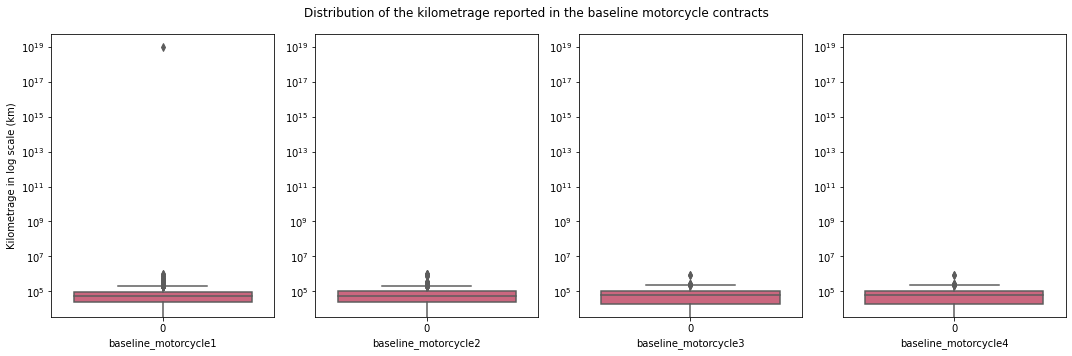

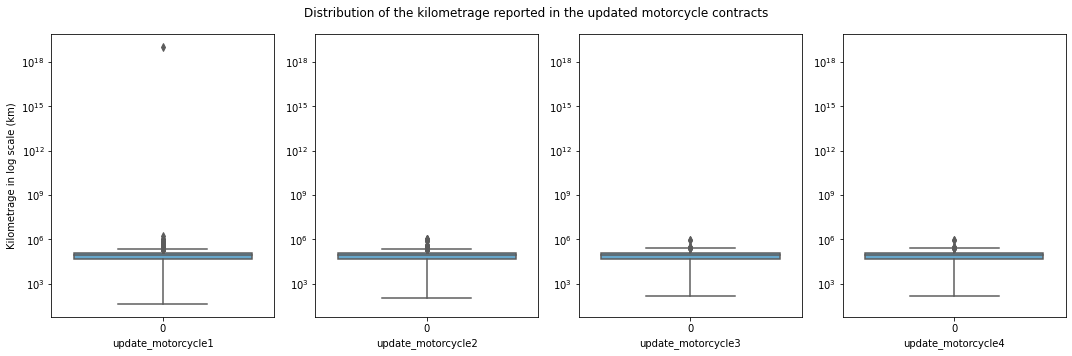

In [13]:
plot_kil_dist("baseline_motorcycle")
plot_kil_dist("update_motorcycle")

We can identify some extreme outliers at approximatly 10<sup>19</sup>km in the `baseline_motorcycle1` and `upadate_motorcycle1` kilometrage values. We will now remove any outlier above 10<sup>7</sup>km. We expect to only remove the extreme outliers identified in the boxplots.

In [14]:
# Removal of the outliers
cleaned_df.drop(cleaned_df[cleaned_df['baseline_motorcycle1']>10**7].index, inplace=True)
cleaned_df.drop(cleaned_df[cleaned_df['update_motorcycle1']>10**7].index, inplace=True)

# Visualisation of the new shape
cleaned_df.shape

(13486, 11)

Two rows containing the extreme outliers were removed from the dataframe. Let's now visualise the kilometrage distribution for `baseline_motorcycle1` without the outliers.

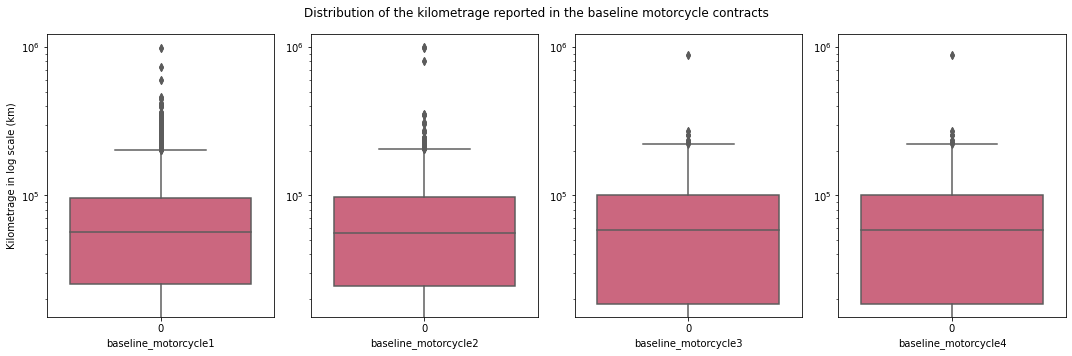

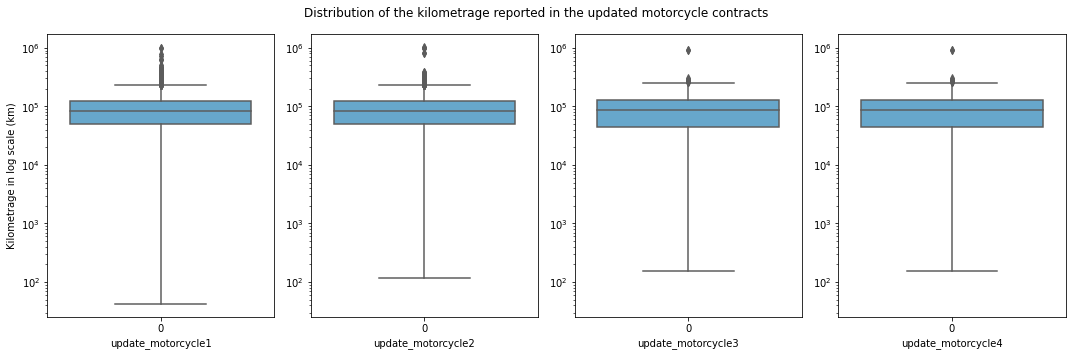

In [15]:
plot_kil_dist("baseline_motorcycle")
plot_kil_dist("update_motorcycle")

We can now see that the distribution for baseline motorcycle 1, 2 ,3 and 4 are similar and show no oddities.

#### 2.4 Discussion:
In the case where outliers couldn't be removed, the mean could be distorted by very influencial outliers. On the other hand, with a big dataset such as ours, the median would be very slightly modified by the ouliers. Hence we would prefer to use the median.

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top *versus* sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

#### 3.1 Creation of three additional columns in the dataframe 

Let's complete our dataframe with those three additional columns.

In [16]:
# New column for average of baseline motorcycle kilometrage
cleaned_df = cleaned_df.assign(baseline_average = lambda x:  x[['baseline_motorcycle1','baseline_motorcycle2','baseline_motorcycle3',
                                               'baseline_motorcycle4']].mean(skipna=True,axis=1)) 

# New column for average of update motorcycle kilometrage
cleaned_df = cleaned_df.assign(update_average = lambda x:  x[['update_motorcycle1','update_motorcycle2','update_motorcycle3',
                                               'update_motorcycle4']].mean(skipna=True,axis=1))

# New column for difference of average between update motorcycle kilometrage and baseline motorcycle kilometrage
cleaned_df = cleaned_df.assign(diff_average = lambda x: x['update_average']-x['baseline_average'])

#### 3.2 Discussion
Another way of aggragating distinct motorcycles from a single policy could be to take the maximum value of the baseline and of the updated kilometrage reported by each customer. Indeed, we suppose dishonest customers have decreased their kilometrage numbers, and especially the highest one. As a result, we expect the maximum value reported by dishonest customers to be lower than the honest customers. 

#### 3.3 Visualisation of the distribution of motorcycles per policy in the data


Let's compare the number of policy between the different motorcycles numbers.

In [17]:
# Grouping of the data by the number of motorcycles per policy
policy_by_number_motorcycles = cleaned_df.groupby('motorcycle_count').apply(lambda x: 
                                                                            pd.Series({'number of policy': x['id'].count()}))

Let's visualise this distribution in a bar chart:

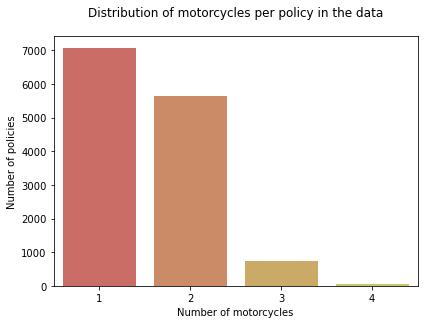

In [18]:
ax = sns.barplot(x=policy_by_number_motorcycles.index.values, y="number of policy", data=policy_by_number_motorcycles, palette = color_palette[0:4])
plt.xticks(rotation = 'horizontal')
plt.tight_layout()
plt.xlabel('Number of motorcycles')
plt.ylabel('Number of policies')
plt.title('Distribution of motorcycles per policy in the data', pad=20);

We can see that there are a lot of policies with one motorcycle and that the number of policies decreases with the augmentation of the number of motorcycles.

#### 3.4 Mean and standard deviation of the average kilometrage for each policy for the updated contract

Let's compute the mean and std of the averages of the updated contract values.

In [19]:
# Computation of the mean and the standard deviation
mean_updated_contract = cleaned_df.update_average.mean()
std_updated_contract = cleaned_df.update_average.std()

# Visualisation in a table
df_stats_average_motorcycle= pd.DataFrame()
df_stats_average_motorcycle['stat'] = ['mean', 'std']
df_stats_average_motorcycle['update_motorcycle'] = [mean_updated_contract, std_updated_contract]
df_stats_average_motorcycle.set_index('stat', inplace = True)
df_stats_average_motorcycle.round(1)

,update_motorcycle
stat,
mean,92167.0
std,52212.9


#### 3.5 Average kilometrage per motorcycle

Considering only policies with 4 motorcycles insured, we compute the mean and stds of their motorcycles kilometrages in the updated contract.

In [20]:
# Computation of the mean and the standard deviation
mean_per_motorcycle = cleaned_df[cleaned_df.motorcycle_count==4][['update_motorcycle1','update_motorcycle2','update_motorcycle3',
                                                  'update_motorcycle4']].mean()
std_per_motorcycle = cleaned_df[cleaned_df.motorcycle_count==4][['update_motorcycle1','update_motorcycle2','update_motorcycle3',
                                                  'update_motorcycle4']].std()
overall_mean_per_motorcycle = mean_per_motorcycle.mean()
overall_std_per_motorcycle = std_per_motorcycle.mean()

# Visualisation in a table
df_stats_per_motorcycle= pd.DataFrame()
df_stats_per_motorcycle['stat'] = ['mean', 'std']
df_stats_per_motorcycle['Per motorcycle'] = [overall_mean_per_motorcycle,overall_std_per_motorcycle]
df_stats_per_motorcycle.set_index('stat', inplace = True)
df_stats_per_motorcycle.round(1)

,Per motorcycle
stat,
mean,113443.9
std,77098.4


#### 3.6 Discussion : 
If we analyze the data at the motorcycle level and have one data point per motorcycle in the dataset, we will have no information concerning the condition ('Sign Top' or 'Sign Bottom') and we will not be able to see any correlation between honesty and the signing location.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

#### 4.1 Computation and visualisation of the mean and the standard deviation of the average kilometrage - updated contracts

First, let's have a look at our modified dataframe, containing the three new columns `baseline_average`, `update_average` and `diff_average`.

In [21]:
cleaned_df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


We then compare the means and stds of the average kilometrage of the updated contracts in the two signing conditions.

In [22]:
# Computation of the mean and the standard deviation
mean = cleaned_df.groupby("condition")['update_average'].mean()
std = cleaned_df.groupby("condition")['update_average'].std()

# Visualisation in a table
df_updated = pd.DataFrame()
df_updated['condition'] = ['Sign Bottom', 'Sign Top']
df_updated['mean of update_average'] = mean['Sign Bottom'], mean['Sign Top']
df_updated['std of update_average'] = std['Sign Bottom'], std['Sign Top']
df_updated.set_index('condition', inplace = True)
df_updated.round(1)

,mean of update_average,std of update_average
condition,,
Sign Bottom,98692.4,51928.2
Sign Top,85794.6,51704.3


Let's note that the mean of `update_average` is higher for the 'Sign Bottom' condition, being the opposite of what we expected. Now that we have computed the means and stds for the two conditions, let's visualise the two distributions in a boxplot.

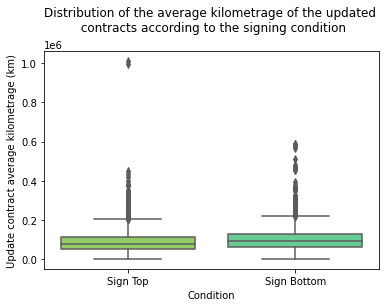

In [23]:
ax = sns.boxplot(x="condition", y="update_average", data=cleaned_df.loc[cleaned_df['condition'].isin(['Sign Bottom','Sign Top'])], palette = [color_palette[5],color_palette[8]])
ax.set_ylabel('Update contract average kilometrage (km)')
ax.set_xlabel('Condition')
ax.set_title('Distribution of the average kilometrage of the updated \n contracts according to the signing condition', pad=20)
plt.show()

#### 4.2 Analysis of statistical differences - updated contracts

To analyse whether there is a statistical difference for the updated contracts between the two conditions ('Sign Top' and 'Sign Bottom'), we calculate the T-test for the means of two independent samples, supposing that the assignment to the two conditions was performed randomly.

- The test statistic: s = `update_average`<sub>Sign Top</sub> – `update_average`<sub>Sign Bottom</sub> 
- The null hypothesis H<sub>0</sub>: `update_average`<sub>Sign Top</sub> = `update_average`<sub>Sign Bottom</sub> i.e.`update_average` values are the same in both conditions
- We reject H<sub>0</sub> if Pr(S > s | H<sub>0</sub>) < α

We set our significance level α at 0.05 (a suitable “small” probability), being high enough to have a low false-positive rate and therefore a high statistical power.

In [24]:
# T-test:
stats.ttest_ind(cleaned_df.loc[cleaned_df['condition'] == 'Sign Bottom']['update_average'], cleaned_df.loc[cleaned_df['condition'] == 'Sign Top']['update_average'])

Ttest_indResult(statistic=14.452368101354606, pvalue=5.435352130291242e-47)

This test evaluates, if the people in the 2 conditions behaved the same way, how likely would we be to find such a distribution of `update_average` values. This test results in a p value of 5.44 * 10<sup>-47</sup>, being inferior to 0.05. As a result, we reject the null hypothesis that `update_average` values are the same in both signing conditions ('Sign Top' and 'Sign Bottom').

#### 4.3 Discussion: does signing at the top decrease dishonesty?

We find a significant difference between the two signing conditions. We have statistical evidence under α = 0.05 that the means of the odometer kilometrage reported by the customers for the updated contract in the two signing conditions (`update_average`) are different.

In 4.1, we saw that the mean of `update_average` is higher for the 'Sign Bottom' condition. As a result, we could speculate that signing at the top does not decrease dishonesty, being the opposite of what was predicted.

#### 4.4 Discussion: Would you expect any differences between the average values between sign at the top vs. sign at the bottom conditions for the baseline contract?

Each customer started by reporting kilometrage values for each of his/her motorcycle (`baseline_average`). After that, each of them was assigned to either the 'Sign Top' or the 'Sign Bottom' condition, and again had to report kilometrage values for each of his/her motorcycle values(`update_average`). As the insurance company randomized the forms (i.e., each customer received exactly one form, each with probability 50%), the participants were assigned randomly to a signing condition. As a result, we expect no difference of values of `baseline_average` in the participants that were lated assigned to the 'Sign Top' condition compared to those lately assigned to the 'Sign Bottom' condition.

#### 4.5 Computation  and visualisation of the mean and the standard deviation of the average kilometrage - baseline contracts

To check this, we start by computing the mean and stds of the average kilometrage of the baseline contracts for the two conditions.

In [25]:
# Computation of the mean and the standard deviation
mean = cleaned_df.groupby("condition")['baseline_average'].mean()
std = cleaned_df.groupby("condition")['baseline_average'].std()

# Visualisation in a table
df_baseline = pd.DataFrame()
df_baseline['condition'] = ['Sign Bottom', 'Sign Top']
df_baseline['mean of baseline_average'] = mean['Sign Bottom'], mean['Sign Top']
df_baseline['std of baseline_average'] = std['Sign Bottom'], std['Sign Top']
df_baseline.set_index('condition', inplace = True)
df_baseline.round(1)

,mean of baseline_average,std of baseline_average
condition,,
Sign Bottom,75020.7,50256.6
Sign Top,59696.2,49956.3


Again, we see that the mean of `baseline_average` is higher for the 'Sign Bottom' condition, being the opposite of what we expected. Let's visualise the two distributions in a boxplot.

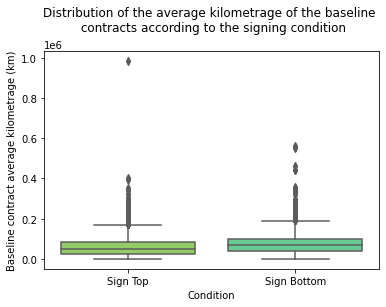

In [26]:
ax = sns.boxplot(x="condition", y="baseline_average", data=cleaned_df.loc[cleaned_df['condition'].isin(['Sign Bottom','Sign Top'])], palette = [color_palette[5],color_palette[8]])
ax.set_ylabel('Baseline contract average kilometrage (km)')
ax.set_xlabel('Condition')
ax.set_title('Distribution of the average kilometrage of the baseline \n contracts according to the signing condition', pad=20)
plt.show()

#### 4.6 Analysis of statistical differences - baseline contracts

Again, to see if there is a statistical difference between the two signing conditions, we perform a T-test, supposing that the assignment to the two conditions was performed randomly.

- The test statistic: s = `baseline_average`<sub>Sign Top</sub> – `baseline_average`<sub>Sign Bottom</sub> 
- The null hypothesis H<sub>0</sub>: `baseline_average`<sub>Sign Top</sub> = `baseline_average`<sub>Sign Bottom</sub> i.e.`baseline_average` values are the same in both conditions
- We reject H<sub>0</sub> if Pr(S > s | H<sub>0</sub>) < α

Similarly, we set our significance level α at 0.05.

In [27]:
stats.ttest_ind(cleaned_df.loc[cleaned_df['condition'] == 'Sign Bottom']['baseline_average'], cleaned_df.loc[cleaned_df['condition'] == 'Sign Top']['baseline_average'])

Ttest_indResult(statistic=17.75773299430071, pvalue=9.333114026345824e-70)

Finally, we see that our p value is equal to 9.33 * 10<sup>-70</sup>, being hugely small (far below 0.05). This test evaluated, if the customers in the 2 conditions behaved the same way, how likely would we be to find such a distribution of `baseline_average` values. As a result, we reject the null hypothesis that `baseline_average` values are the same in both conditions, concluding that there is a significant difference between the 'Sign Top' and 'Sign Bottom' conditions. This is very intriguing as this supposes that the two groups were not made randomly... 

As we saw that the mean of `baseline_average` is higher for the 'Sign Bottom' condition (4.5), this leads us to believe that perhaps the people who were assigned to 'Sign Bottom' where the one that had the more kilometer in the baseline contract, and could be the most honest.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

#### 5.1 Distribution of odometer kilometrage reported for the 1st motorcycle insured in each policy

We start by plotting the distribution of odometer kilometrage reported for the first motorcycle insured in each policy for the baseline and the updated contracts.

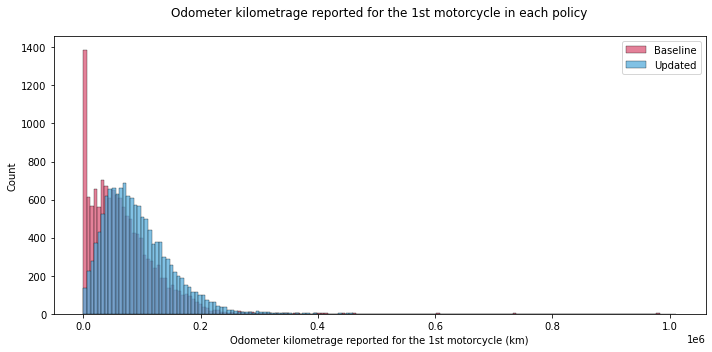

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(cleaned_df.baseline_motorcycle1, label = 'Baseline', color = color_palette[19])
sns.histplot(cleaned_df.update_motorcycle1, label='Updated', color = color_palette[11])
plt.legend()
plt.xlabel('Odometer kilometrage reported for the 1st motorcycle (km)')
plt.ylabel('Count')
plt.title('Odometer kilometrage reported for the 1st motorcycle in each policy', pad=20)
plt.tight_layout()
plt.show()

#### 5.2 Distribution of the difference of the odometer kilometrage for the first motorcycle insured in each policy

Then, we plot the distribution of the odometer kilometrage reported for the first motorcycle insured in the baseline contract, the updated contract and the difference between those two values.

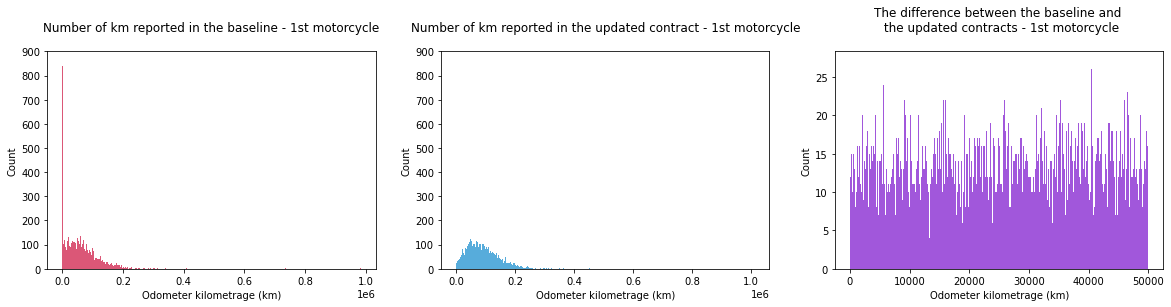

In [29]:
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(1, 3, 1)
plt.hist(cleaned_df.baseline_motorcycle1, bins=1000, color = color_palette[19])
plt.title('Number of km reported in the baseline - 1st motorcycle', pad=20)
plt.xlabel('Odometer kilometrage (km)')
plt.ylabel('Count')
plt.ylim([0,900])
ax2 = plt.subplot(1, 3, 2)
plt.hist(cleaned_df.update_motorcycle1, bins=1000, color = color_palette[11])
plt.title('Number of km reported in the updated contract - 1st motorcycle', pad=20)
plt.xlabel('Odometer kilometrage (km)')
plt.ylabel('Count')
plt.ylim([0,900])
plt.subplot(1, 3, 3)
plt.hist(cleaned_df.update_motorcycle1 - cleaned_df.baseline_motorcycle1, color= color_palette[15], bins=1000)
plt.title('The difference between the baseline and \n the updated contracts - 1st motorcycle', pad=20)
plt.xlabel('Odometer kilometrage (km)')
plt.ylabel('Count')
plt.show()

#### 5.3 Discuss.

We can observe a uniform distribution for the difference between updated and baseline odometer. As this difference corresponds to a natural random event we would expect a normal shape distribution with a majority at the center and low tails. This is definitely not what we obtain here where the extremes are at the same height as the center. As a result, it is unlikely that this data originated from real odometers.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

#### 6.1 Distribution of occurrences of the last three digits

We plot the distribution of occurrences of the last three digits of the reported odometer kilometrages in the baseline and the updated contracts.

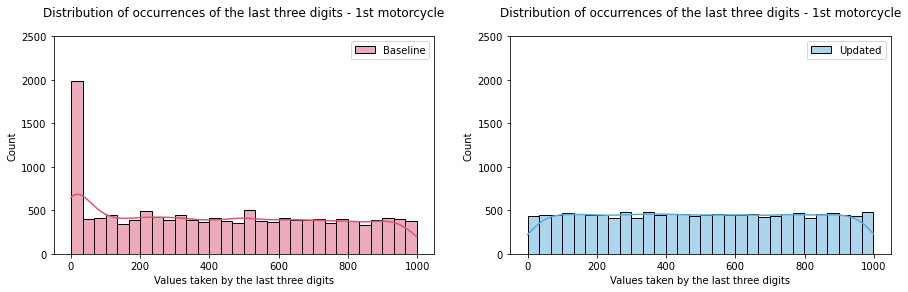

In [30]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(cleaned_df.baseline_motorcycle1 % 1000, kde=True,label = 'Baseline', bins=30, color = color_palette[19])
plt.xlabel('Values taken by the last three digits')
plt.title('Distribution of occurrences of the last three digits - 1st motorcycle', pad=20)
plt.legend()
plt.ylim([0,2500])
plt.subplot(1,2,2)
sns.histplot(cleaned_df.update_motorcycle1 % 1000, kde=True, label='Updated',bins=30, color= color_palette[11])
plt.legend()
plt.xlabel('Values taken by the last three digits')
plt.title('Distribution of occurrences of the last three digits - 1st motorcycle', pad=20)
plt.ylim([0,2500])
plt.show()

#### 6.2 Discussion

The difference between the two distributions is noticeable on the left side side of our graph. The distribution of the last 3 digits of the baseline has a higher frequency in the small range of [000,050] while the distribution of the updated contract is a stagnant one.

#### 6.3 Discussion

In the baseline form, a possible cause of this difference of distribution would be that people cheat "a little bit" by lowering their last 3 digit odometer count to values near [000,050]. There may also be new customers that therefore have no kilometrage in their baseline (first) contract.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

#### 7.1 Loading the fonts data and adding it to our dataframe

Let's start by loading and examining fonts data, then add it to our dataframe.

In [31]:
FONTS_FILE = 'fonts.csv'
fonts_df = pd.read_csv(PATH+FONTS_FILE)
fonts_df.head()

,id,font
0,1,Helvetica
1,2,Helvetica
2,3,Helvetica
3,4,Helvetica
4,5,Arial


In [32]:
final_df = cleaned_df.merge(fonts_df, on="id")

We then have a look a our new dataframe containing the fonts in which the rows were written.

In [33]:
final_df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0,Helvetica
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5,Helvetica
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0,Helvetica
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0,Helvetica
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial


Our dataframe now contains our motorcycles' data as well as the fonts in which they were written.

#### 7.2 Computation of the number of rows with the Arial and the Helvetica font and visualisation of their baseline kilometers -  first motorcycle in each policy

Let's visualise the distribution of the fonts in our dataframe.

In [34]:
fonts_baseline = final_df.groupby("font")['baseline_motorcycle1'].agg(['count'])
fonts_updated = final_df.groupby("font")['update_motorcycle1'].agg(['count'])

In [35]:
# Visualisation in a table
fonts_baseline.sort_values("count", ascending=False).head()

,count
font,
Arial,6744
Helvetica,6742


In [36]:
# Visualisation in a table
fonts_updated.sort_values("count", ascending=False).head()

,count
font,
Arial,6744
Helvetica,6742


Approximately the same numbers of rows were written in Arial (6744) and in Helvetica (6742), both in the baseline and in the updated contract. Let's visualise the Arial *versus* Helvetica rows of the baseline contract in a boxplot.

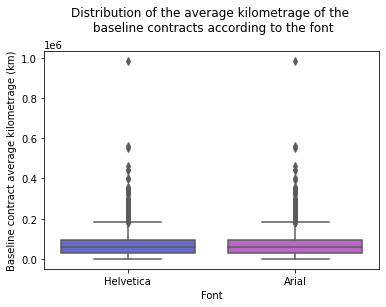

In [37]:
ax = sns.boxplot(x="font", y="baseline_average", data=final_df.loc[final_df['font'].isin(['Arial','Helvetica'])], palette = [color_palette[13],color_palette[16]])
ax.set_ylabel('Baseline contract average kilometrage (km)')
ax.set_xlabel('Font')
ax.set_title('Distribution of the average kilometrage of the \n baseline contracts according to the font', pad=20)
plt.show()

#### 7.3 Plot of the distribution of the last three digits for 1) the first motorcycle in each baseline contract (baseline_motorcycle1); and 2) the first motorcycle in each updated contract (update_motorcycle1).

We compare the occurrence of the last three digits between Helvetica and Arial, for both updated and baseline.

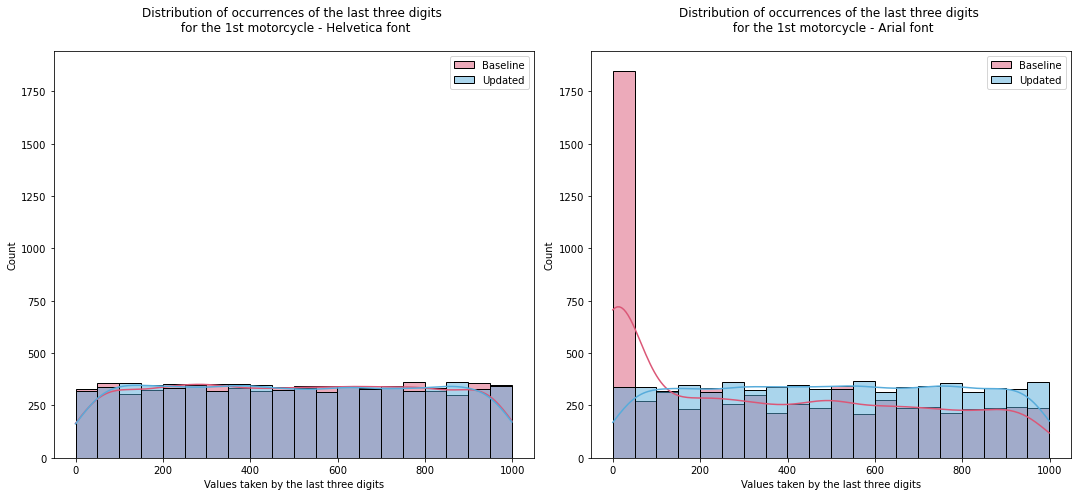

In [38]:
fig = plt.figure(figsize=(30,7))

ax1 = fig.add_subplot(141)
sns.histplot(final_df[final_df['font'] == 'Helvetica'].baseline_motorcycle1 % 1000, kde=True, label = 'Baseline', bins=20, color = color_palette[19])
sns.histplot(final_df[final_df['font'] == 'Helvetica'].update_motorcycle1 % 1000, kde=True, label='Updated', bins=20, color= color_palette[11])
plt.legend()
plt.xlabel('Values taken by the last three digits')
plt.title('Distribution of occurrences of the last three digits \n for the 1st motorcycle - Helvetica font', pad=20)
    
ax2 = fig.add_subplot(142, sharey = ax1)
sns.histplot(final_df[final_df['font'] == 'Arial'].baseline_motorcycle1 % 1000, kde=True, label = 'Baseline', bins=20, color = color_palette[19])
sns.histplot(final_df[final_df['font'] == 'Arial'].update_motorcycle1 % 1000, kde=True, label='Updated', bins=20, color= color_palette[11])
plt.legend()
plt.xlabel('Values taken by the last three digits')
plt.title('Distribution of occurrences of the last three digits \n for the 1st motorcycle - Arial font', pad=20)

plt.tight_layout()
plt.show()

We see that the occurance of values near [0,50] for the last three digits only occurs in the baseline contract of the 1st motorcycle (as seen in 6.1) and only in the Arial font. The last three digits of the Helvetica font seems equally distributed ([0,1000]). 

#### 7.4 Discussion

Previously (Task 6), we analysed the values taken by the last three digits of the 1st motorcycle for each policy. We then compared a possible difference between the baseline and the updated contracts. There was a great number of customers that reported low digits ([000,050]) for the baseline, compared to the updated contract. As already stated in 6.3, this could be due to the presence of new customers, and to the fact that humans tend to decrease "a little bit" their numbers by decreasing the last three digits (round down to the nearest large number). 

We then focused on the values taken by the last three digits of the 1st motorcycle in the baseline contract and compared the two fonts. 
- When rows were written in Arial font, there was this "natural" great number of small digits. 
- Our anonymous source told us that the Helvetica fonts were fabricated. Looking at the Helvetica rows, we see no [000,050] peak. This is strange as we assume most of those customers would also have "naturally" round down their kilometrage to the nearest large number. It is also intriguing that so few of them are new customers.

As a result, this leads us to believe that the Helvetica fonts were fabricated.

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

#### 8.1 Discussion

Dear Sir,
- An anonymous source contacted us with some hints which later turned out to be correct. Indeed, after analysing the data, three observations lead us to conclude that they had been tampered with. <br> First, in Task 4.6, we have statistical evidence that customers were not randomly distributed between the two conditions ‘Sign Top’ and ‘Sign Bottom’, which is the opposite of what we were told by the company. <br>Then, we observed (in Task 5.3) that the difference between the baseline and the updated contracts was uniformly distributed, contrasting with the expected normal shaped distribution with low tails. <br>Finally, in Task 7, we realised that the text written in Helvetica font was fabricated. Indeed, there was no “low digits’ peak” ([000,050]) in the distribution of the last three digits of the odometer kilometrage of the 1st motorcycle in the baseline contracts.


- Therefore, we continued our research. The rows written in Arial seem unmodified, but those customers were not randomly distributed in the two signing conditions. In fact, in the plot below (cell 39), when we separate the Arial font rows depending on the signing condition they were lately assigned to, the [000,050] peak only occurred in the future 'Sign Top' clients. Therefore, it seems that most of the customers that down rounded their kilometrage were later assigned to the ‘Sign Top’ condition. On the other hand, we hypothesise that the Helvetica rows have been manually modified to uniformly distribute the occurrences of those last 3 digits (cell 40). Parallelly, the [000,050] peak is not present in the updated contract either, indicating that we cannot even trust the updated data.


- As our data has been tampered with, it is impossible for us to conduct a meaningful study. Therefore, we cannot lead to any conclusion with this dataset.

Best,

SV4EVER

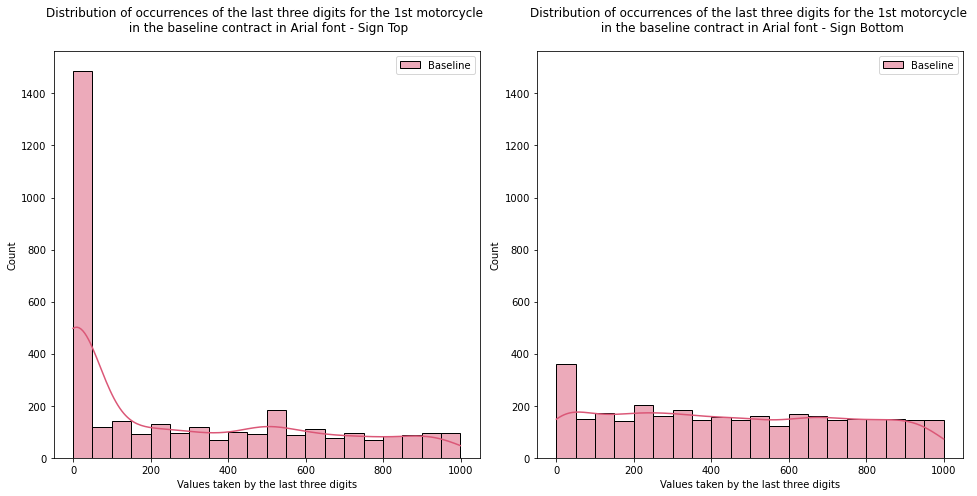

In [39]:
# Baseline contract - 1st motorcycle - Arial font - Distribution of 'Sign Bottom' VS 'Sign Top' condition
fig = plt.figure(figsize=(27,7))

ax1 = fig.add_subplot(141)
sns.histplot(final_df[(final_df['font'] == 'Arial') & (final_df['condition'] == 'Sign Top')].baseline_motorcycle1 % 1000, kde=True, label = 'Baseline', bins=20, color = color_palette[19])
plt.legend()
plt.xlabel('Values taken by the last three digits')
plt.title('Distribution of occurrences of the last three digits for the 1st motorcycle \n in the baseline contract in Arial font - Sign Top', pad=20)
    
ax2 = fig.add_subplot(142, sharey = ax1)
sns.histplot(final_df[(final_df['font'] == 'Arial') & (final_df['condition'] == 'Sign Bottom')].baseline_motorcycle1 % 1000, kde=True, label = 'Baseline', bins=20, color = color_palette[19])
plt.legend()
plt.xlabel('Values taken by the last three digits')
plt.title('Distribution of occurrences of the last three digits for the 1st motorcycle \n in the baseline contract in Arial font - Sign Bottom', pad=20)

plt.tight_layout()
plt.show()

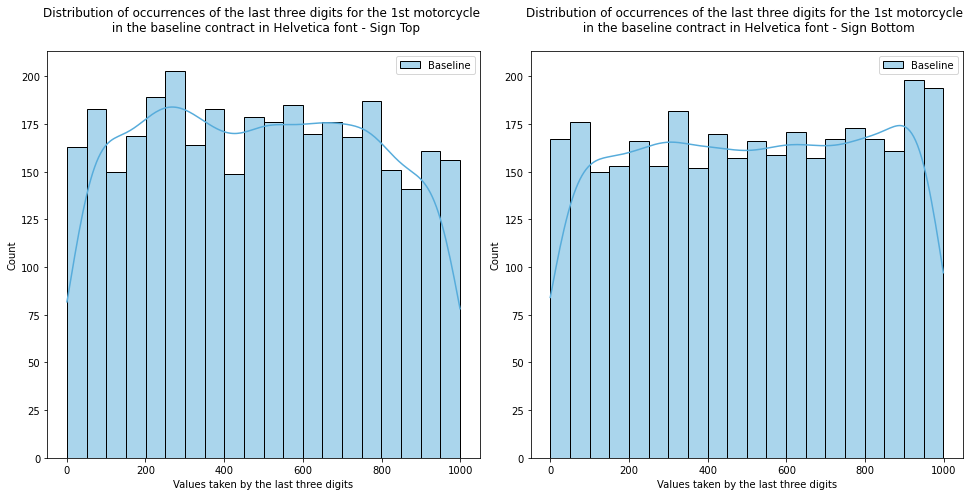

In [40]:
# Baseline contract - 1st motorcycle - Helvetica font - Distribution of 'Sign Bottom' VS 'Sign Top' condition
fig = plt.figure(figsize=(27,7))

ax1 = fig.add_subplot(141)
sns.histplot(final_df[(final_df['font'] == 'Helvetica') & (final_df['condition'] == 'Sign Top')].baseline_motorcycle1 % 1000, kde=True, label = 'Baseline', bins=20, color = color_palette[11])
plt.legend()
plt.xlabel('Values taken by the last three digits')
plt.title('Distribution of occurrences of the last three digits for the 1st motorcycle \n in the baseline contract in Helvetica font - Sign Top', pad=20)
    
ax2 = fig.add_subplot(142, sharey = ax1)
sns.histplot(final_df[(final_df['font'] == 'Helvetica') & (final_df['condition'] == 'Sign Bottom')].baseline_motorcycle1 % 1000, kde=True, label = 'Baseline', bins=20, color = color_palette[11])
plt.legend()
plt.xlabel('Values taken by the last three digits')
plt.title('Distribution of occurrences of the last three digits for the 1st motorcycle \n in the baseline contract in Helvetica font - Sign Bottom', pad=20)

plt.tight_layout()
plt.show()